In [16]:
%matplotlib inline
from __future__ import print_function
from matplotlib import pyplot as plt
import collections
import os, struct
import numpy as np
import scipy as sp
import scipy.io
import random
import math
from random import randint
import string
import tensorflow as tf
import gzip
import zlib
import tarfile
import pandas as pd
from six.moves import range
from six.moves.urllib.request import urlretrieve
from array import array as pyarray 
from six.moves import cPickle as pickle
from scipy.misc import imresize
from IPython.display import Image, display
from os import listdir
import skimage
from skimage import data
from skimage import exposure
from skimage import img_as_ubyte
from skimage.transform import resize
from skimage.transform import rescale
from skimage.transform import rotate
from skimage import novice

from __future__ import print_function
from matplotlib import pyplot as plt
import collections
import os, struct
import numpy as np
import scipy as sp
import math
import random
from random import randint
import string
import tensorflow as tf
import gzip
import zlib
import tarfile
import pandas as pd
from six.moves import range
from six.moves.urllib.request import urlretrieve
from array import array as pyarray 
from six.moves import cPickle as pickle
from scipy.misc import imresize
import skimage
from skimage import data
from skimage import exposure
from skimage import img_as_ubyte
from skimage.transform import resize
from skimage.transform import rescale
from skimage.transform import rotate
from skimage import novice

In [13]:
def maybe_download(base_url, dest_folder, filename, expected_bytes=None):
    """Download a file if not present, and make sure it's the right size."""
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    filepath = os.path.join(dest_folder,filename)
    if not os.path.exists(filepath):
        filepath, _ = urlretrieve(base_url + filename, filepath)
    statinfo = os.stat(filepath)
    if expected_bytes is None or statinfo.st_size == expected_bytes:
        print('Found and verified %s' % filename)
    else:
        print(statinfo.st_size)
        raise Exception(
            'Failed to verify ' + filename + '. Can you get to it with a browser?')
    return filename

def maybe_untargz(filename, dest_folder,force=False):
    extraction_dir = filename.split(".")[0]
    if not os.path.isdir(extraction_dir):
        tar = tarfile.open(filename, "r:gz")
        tar.extractall(dest_folder)
        tar.close()
        print (filename + " extracted to " + extraction_dir)
    else:
        print ("Folder " + extraction_dir + " already exists. Skipping")
        
def saveAsPickle(data,filename):
    try:
        with open(filename, 'wb') as f:
            pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
            print (filename + " pickled!")
    except Exception as e:
        print('Unable to save data to', filename, ':', e)
        
def loadPickle(file):
    with open(file, 'rb') as pickle_file:
        return pickle.load(pickle_file)

In [11]:
path = r'/home/hanu/dataset/svhn/f1/'

svhn_base_url = "http://ufldl.stanford.edu/housenumbers/"
svhn_dest_folder = path

In [6]:
svhn_train_format_1 = maybe_download(svhn_base_url,svhn_dest_folder, "train.tar.gz")
svhn_test_format_1 = maybe_download(svhn_base_url,svhn_dest_folder, "test.tar.gz")
svhn_extra_format_1 = maybe_download(svhn_base_url,svhn_dest_folder, "extra.tar.gz")

     
maybe_untargz(os.path.join(svhn_dest_folder,"train.tar.gz"), svhn_dest_folder)
maybe_untargz(os.path.join(svhn_dest_folder,"test.tar.gz"), svhn_dest_folder)
maybe_untargz(os.path.join(svhn_dest_folder,"extra.tar.gz"), svhn_dest_folder)

Found and verified train.tar.gz
Found and verified test.tar.gz
Found and verified extra.tar.gz
/home/hanu/dataset/svhn/f1/train.tar.gz extracted to /home/hanu/dataset/svhn/f1/train
/home/hanu/dataset/svhn/f1/test.tar.gz extracted to /home/hanu/dataset/svhn/f1/test
/home/hanu/dataset/svhn/f1/extra.tar.gz extracted to /home/hanu/dataset/svhn/f1/extra


In [7]:
imagesPath = os.path.join(svhn_dest_folder,'train')
imagesNames = [f for f in os.listdir(imagesPath) if f.endswith('.png')][:300]

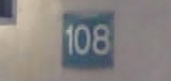

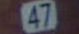

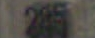

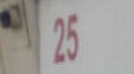

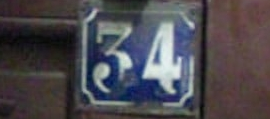

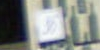

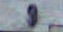

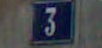

In [13]:
for imageName in imagesNames[:10]:
    display(Image(filename=os.path.join(imagesPath,imageName)))

In [17]:
import digitStructMatToCsv
def matToCsv(sourceMat, destCsv, force=False):
    if (os.path.isfile(destCsv)):
        print (sourceMat + " already converted to " + destCsv)
    else:
        csvFile = open(destCsv, 'wb')
        digitStructMatToCsv.writeToCsvFile(sourceMat, csvFile)
        csvFile.close()
        print (sourceMat + " converted to " + destCsv)
        
matToCsv(os.path.join(svhn_dest_folder,"train","digitStruct.mat")
         ,os.path.join(svhn_dest_folder,"train","digitStruct.csv"))
matToCsv(os.path.join(svhn_dest_folder,"test","digitStruct.mat")
         ,os.path.join(svhn_dest_folder,"test","digitStruct.csv"))
matToCsv(os.path.join(svhn_dest_folder,"extra","digitStruct.mat")
         ,os.path.join(svhn_dest_folder,"extra","digitStruct.csv"))

svhn_train_digit_info = pd.read_csv(os.path.join(svhn_dest_folder,"train","digitStruct.csv"))
svhn_test_digit_info = pd.read_csv(os.path.join(svhn_dest_folder,"test","digitStruct.csv"))
svhn_extra_digit_info = pd.read_csv(os.path.join(svhn_dest_folder,"extra","digitStruct.csv"))
display(svhn_train_digit_info.head())
display(svhn_test_digit_info.head())
display(svhn_extra_digit_info.head())

Number of image files: 33402
/home/hanu/dataset/svhn/f1/train/digitStruct.mat converted to /home/hanu/dataset/svhn/f1/train/digitStruct.csv
Number of image files: 13068
/home/hanu/dataset/svhn/f1/test/digitStruct.mat converted to /home/hanu/dataset/svhn/f1/test/digitStruct.csv
Number of image files: 202353
/home/hanu/dataset/svhn/f1/extra/digitStruct.mat converted to /home/hanu/dataset/svhn/f1/extra/digitStruct.csv


,FileName,DigitLabel,Left,Top,Width,Height
0,1.png,1,246,77,81,219
1,1.png,9,323,81,96,219
2,2.png,2,77,29,23,32
3,2.png,3,98,25,26,32
4,3.png,2,17,5,8,15


,FileName,DigitLabel,Left,Top,Width,Height
0,1.png,5,43,7,19,30
1,2.png,2,99,5,14,23
2,2.png,1,114,8,8,23
3,2.png,10,121,6,12,23
4,3.png,6,61,6,11,16


,FileName,DigitLabel,Left,Top,Width,Height
0,1.png,4,24,70,38,56
1,1.png,7,55,41,36,56
2,1.png,8,79,23,47,56
3,2.png,7,32,13,94,203
4,2.png,1,143,33,38,203


In [18]:
def create_svhn_metadata(image_folder,dataframe):
    df = pd.DataFrame(columns=('filename', 'value', 'digits', 'length', 'width', 'height','box'))
    current_image_file = ""
    digits = []
    left = top = 999999
    right = bottom = 0
    for i,row in dataframe.iterrows():
        
        if current_image_file != row['FileName']:
            if len(digits) > 0:
                img = novice.open(os.path.join(image_folder,current_image_file))
                df.loc[len(df)] = [current_image_file ,int("".join(str(x) for x in digits)), digits, len(digits), img.width, img.height,[left,top,right,bottom]]
            current_image_file = row['FileName']
            digits = []
            left = top = 999999
            right = bottom = 0
            
        # Since 0 are encoded as 10 in the mat and csv. we substite 10 with 0    
        digit = 0 if row['DigitLabel'] == 10 else row['DigitLabel']
        # The street number surrounding crop box
        left = min(row['Left'],left)
        top = min(row['Top'],top)
        right = max(row['Left'] + row['Width'],right)
        bottom = max(row['Top'] + row['Height'],bottom)
        digits.append(digit)

    return df

In [ ]:
svhn_train_df = create_svhn_metadata(os.path.join(svhn_dest_folder,"train"),svhn_train_digit_info)
svhn_test_df = create_svhn_metadata(os.path.join(svhn_dest_folder,"test"),svhn_test_digit_info)
svhn_extra_df = create_svhn_metadata(os.path.join(svhn_dest_folder,"extra"),svhn_extra_digit_info)

saveAsPickle(svhn_train_df, os.path.join(svhn_dest_folder,"train","digitStruct.dataframe"))
saveAsPickle(svhn_test_df, os.path.join(svhn_dest_folder,"test","digitStruct.dataframe"))
saveAsPickle(svhn_extra_df, os.path.join(svhn_dest_folder,"extra","digitStruct.dataframe"))

In [17]:
svhn_train_df = loadPickle(os.path.join(svhn_dest_folder,"train","digitStruct.dataframe"))
svhn_test_df = loadPickle(os.path.join(svhn_dest_folder,"test","digitStruct.dataframe"))
svhn_extra_df = loadPickle(os.path.join(svhn_dest_folder,"extra","digitStruct.dataframe"))

display(svhn_train_df.head())
display(svhn_test_df.head())
display(svhn_extra_df.head())

,filename,value,digits,length,width,height,box
0,1.png,19.0,"[1, 9]",2.0,741.0,350.0,"[246, 77, 419, 300]"
1,2.png,23.0,"[2, 3]",2.0,199.0,83.0,"[77, 25, 124, 61]"
2,3.png,25.0,"[2, 5]",2.0,52.0,23.0,"[17, 5, 34, 20]"
3,4.png,93.0,"[9, 3]",2.0,161.0,79.0,"[57, 13, 85, 47]"
4,5.png,31.0,"[3, 1]",2.0,140.0,68.0,"[52, 7, 89, 56]"


,filename,value,digits,length,width,height,box
0,1.png,5.0,[5],1.0,99.0,47.0,"[43, 7, 62, 37]"
1,2.png,210.0,"[2, 1, 0]",3.0,182.0,48.0,"[99, 5, 133, 31]"
2,3.png,6.0,[6],1.0,101.0,31.0,"[61, 6, 72, 22]"
3,4.png,1.0,[1],1.0,75.0,31.0,"[32, 6, 46, 23]"
4,5.png,9.0,[9],1.0,215.0,81.0,"[97, 28, 116, 56]"


,filename,value,digits,length,width,height,box
0,1.png,478.0,"[4, 7, 8]",3.0,166.0,141.0,"[24, 23, 126, 126]"
1,2.png,71.0,"[7, 1]",2.0,295.0,261.0,"[32, 13, 181, 236]"
2,3.png,174.0,"[1, 7, 4]",3.0,137.0,96.0,"[18, 5, 106, 81]"
3,4.png,30.0,"[3, 0]",2.0,79.0,50.0,"[11, 6, 55, 44]"
4,5.png,288.0,"[2, 8, 8]",3.0,81.0,50.0,"[8, 5, 63, 43]"


In [18]:
print ("TRAINING")
print ("Max value: %d" % int(svhn_train_df['value'].max()))
print ("Min value: %d" % int(svhn_train_df['value'].min()))
print ("Max length: %d" % int(svhn_train_df['length'].max()))
print ("Min length: %d" % int(svhn_train_df['length'].min()))

print ("\nEXTRA")
print ("Max value: %d" % int(svhn_extra_df['value'].max()))
print ("Min value: %d" % int(svhn_extra_df['value'].min()))
print ("Max length: %d" % int(svhn_extra_df['length'].max()))
print ("Min length: %d" % int(svhn_extra_df['length'].min()))

TRAINING
Max value: 135458
Min value: 0
Max length: 6
Min length: 1

EXTRA
Max value: 70333
Min value: 0
Max length: 5
Min length: 1


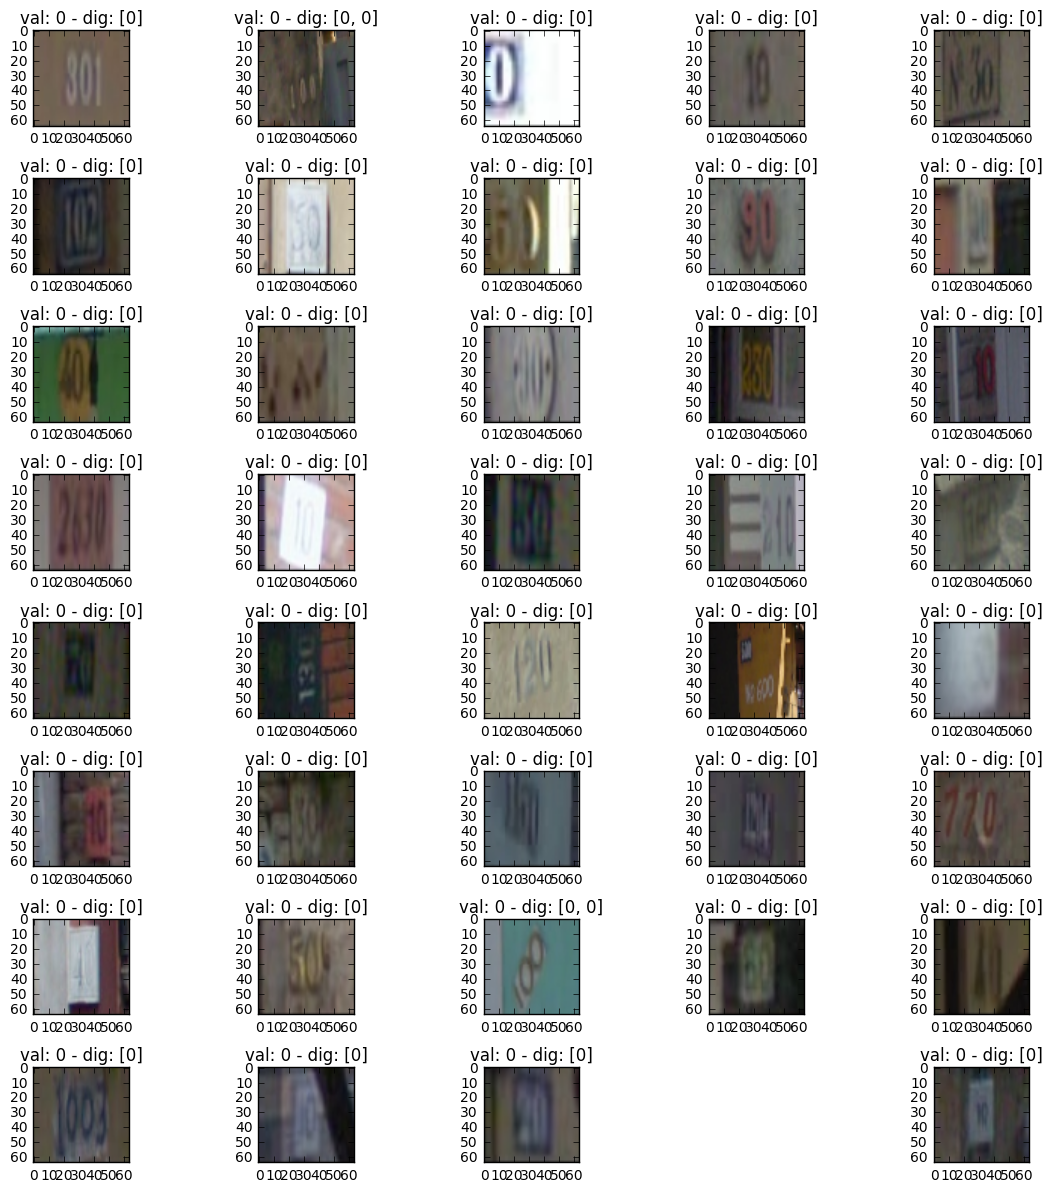

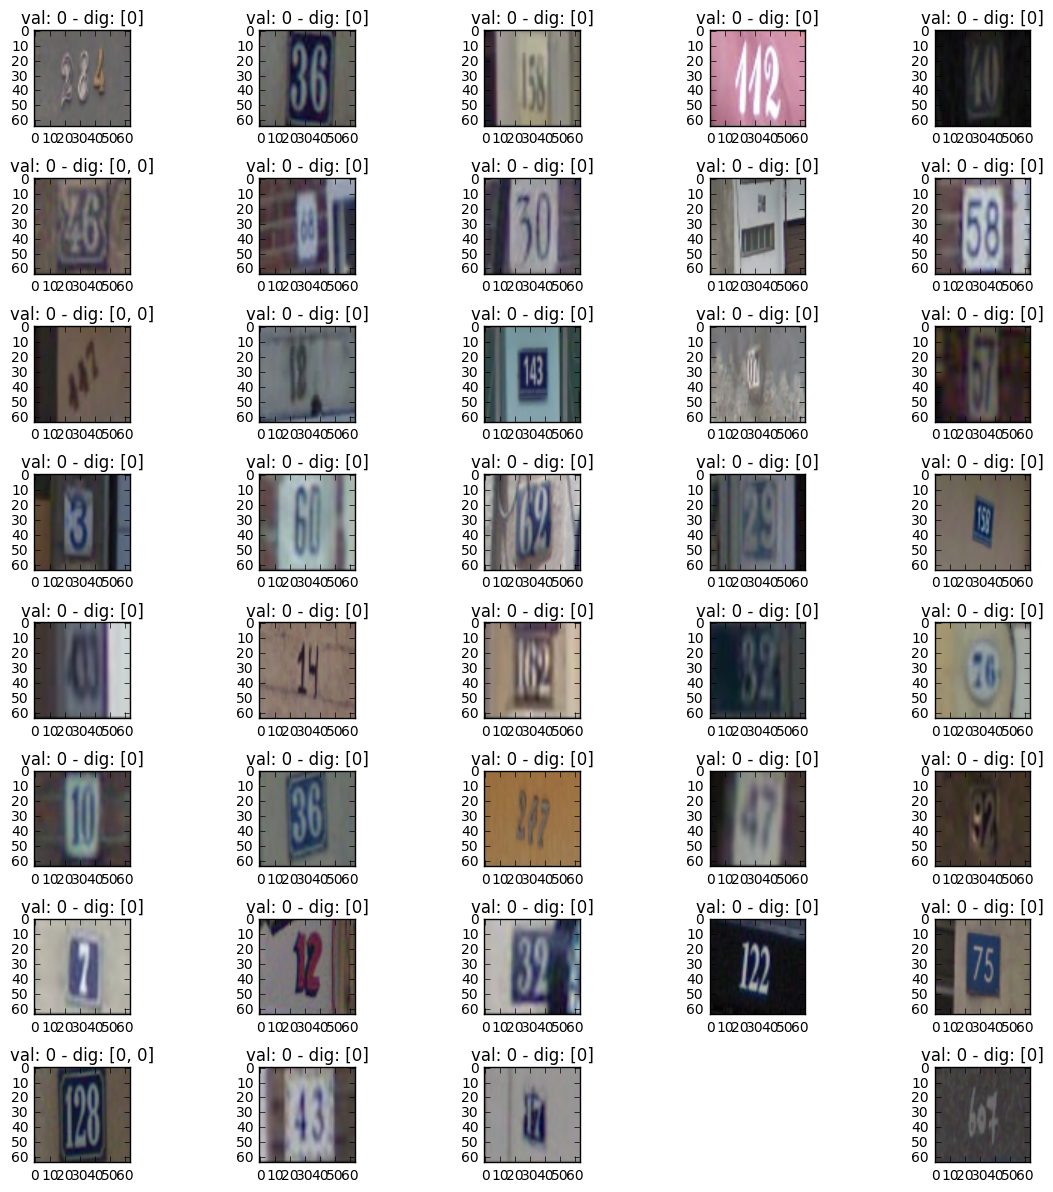

In [20]:
# Display images and metadata corresponding to zero values
def show_zero(df):
    fig = plt.figure(figsize=(12, 12), dpi=80)
    if df.shape[0] == 0:
        print ("No zero values in dataframe.")
        return
    for i in range(min(df.shape[0],40)):
        plt.subplot(8,5,i+1)
        plt.title(str("val: %d - dig: %s" % (int(df.iloc[i]['value']), str(df.iloc[i]['digits']))))
        #img_path = os.path.join("/dataset/svhn/f1","svhn","train",df.iloc[i]['filename'])
        img_path = os.path.join(svhn_dest_folder,"train",df.iloc[i]['filename'])        
        img = skimage.io.imread(img_path)
        img = resize(image=img,output_shape=(64,64))
        plt.imshow(img)
        plt.tight_layout()
    plt.show()

zero_values_train = svhn_train_df.loc[svhn_train_df['value'] == 0].reset_index(drop=True)
zero_values_extra = svhn_extra_df.loc[svhn_extra_df['value'] == 0].reset_index(drop=True)
show_zero(zero_values_train)
show_zero(zero_values_extra)

In [21]:
svhn_train_df = svhn_train_df[svhn_train_df.value != 0].reset_index(drop=True)
svhn_test_df = svhn_test_df[svhn_test_df.value != 0].reset_index(drop=True)
svhn_extra_df = svhn_extra_df[svhn_extra_df.value != 0].reset_index(drop=True)
saveAsPickle(svhn_train_df, os.path.join(svhn_dest_folder,"train","digitStruct_nozeros.dataframe"))
saveAsPickle(svhn_test_df, os.path.join(svhn_dest_folder,"test","digitStruct_nozeros.dataframe"))
saveAsPickle(svhn_extra_df, os.path.join(svhn_dest_folder,"extra","digitStruct_nozeros.dataframe"))

/home/hanu/dataset/svhn/f1/train/digitStruct_nozeros.dataframe pickled!
/home/hanu/dataset/svhn/f1/test/digitStruct_nozeros.dataframe pickled!
/home/hanu/dataset/svhn/f1/extra/digitStruct_nozeros.dataframe pickled!


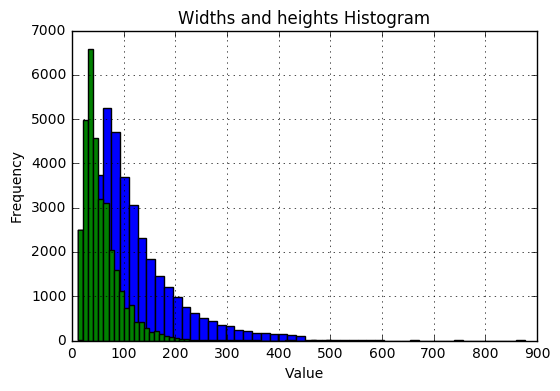

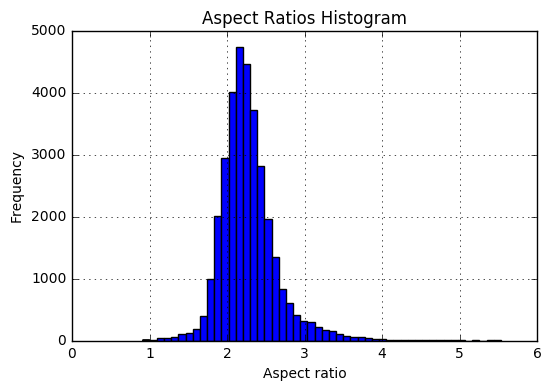

Median width: 104
Median height: 47


In [22]:
plt.title("Widths and heights Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.hist(svhn_train_df['width'],50)
plt.hist(svhn_train_df['height'],50)
plt.grid(True)
fig = plt.show()

plt.title("Aspect Ratios Histogram")
plt.xlabel("Aspect ratio")
plt.ylabel("Frequency")
plt.hist(svhn_train_df['width']/svhn_train_df['height'],50)
plt.grid(True)
fig = plt.show()

print ("Median width: %d" % svhn_train_df['width'].median())
print ("Median height: %d" % svhn_train_df['height'].median())
# print ("Median ratio: %.2f" % images_info['aspect'].median())

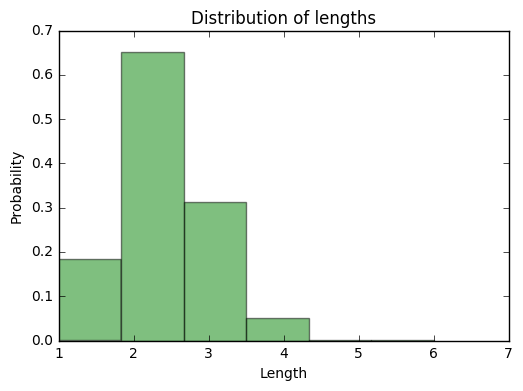

In [23]:
lengths = svhn_train_df['length'].tolist()
bins = int(max(lengths))
n, bins, patches = plt.hist(lengths, bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Length')
plt.ylabel('Probability')
plt.title(r'Distribution of lengths')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [3]:
mnist_base_url = 'http://yann.lecun.com/exdb/mnist/'
mnist_dest_folder = r'/home/hanu/dataset/mnist/'

In [5]:
train_images = maybe_download(mnist_base_url, mnist_dest_folder, 'train-images-idx3-ubyte.gz', 9912422)
train_labels = maybe_download(mnist_base_url, mnist_dest_folder, 'train-labels-idx1-ubyte.gz', 28881)
test_images = maybe_download(mnist_base_url, mnist_dest_folder, 't10k-images-idx3-ubyte.gz', 1648877)
test_labels = maybe_download(mnist_base_url, mnist_dest_folder, 't10k-labels-idx1-ubyte.gz', 4542)

files = [train_images,train_labels]

for file in files:
    filepath = os.path.join(mnist_dest_folder,file)
    inF = gzip.open(filepath, 'rb')
    outF = open(filepath.split(".",2)[0], 'wb')
    outF.write( inF.read() )
    inF.close()
    outF.close()

Found and verified train-images-idx3-ubyte.gz
Found and verified train-labels-idx1-ubyte.gz
Found and verified t10k-images-idx3-ubyte.gz
Found and verified t10k-labels-idx1-ubyte.gz


In [6]:
def load_mnist(dataset="training", digits=None, path="", asbytes=False, selection=None, return_labels=True, return_indices=False):
    """
    from: https://raw.githubusercontent.com/amitgroup/amitgroup/master/amitgroup/io/mnist.py
    Loads MNIST files into a 3D numpy array.

    Parameters
    ----------
    dataset : str 
        Either "training" or "testing", depending on which dataset you want to
        load. 
    digits : list 
        Integer list of digits to load. The entire database is loaded if set to
        ``None``. Default is ``None``.
    path : str 
        Path to your MNIST datafiles. The default is ``None``, which will try
        to take the path from your environment variable ``MNIST``. The data can
        be downloaded from http://yann.lecun.com/exdb/mnist/.
    asbytes : bool
        If True, returns data as ``numpy.uint8`` in [0, 255] as opposed to
        ``numpy.float64`` in [0.0, 1.0].
    selection : slice
        Using a `slice` object, specify what subset of the dataset to load. An
        example is ``slice(0, 20, 2)``, which would load every other digit
        until--but not including--the twentieth.
    return_labels : bool
        Specify whether or not labels should be returned. This is also a speed
        performance if digits are not specified, since then the labels file
        does not need to be read at all.
    return_indicies : bool
        Specify whether or not to return the MNIST indices that were fetched.
        This is valuable only if digits is specified, because in that case it
        can be valuable to know how far
        in the database it reached.

    Returns
    -------
    images : ndarray
        Image data of shape ``(N, rows, cols)``, where ``N`` is the number of images. If neither labels nor inices are returned, then this is returned directly, and not inside a 1-sized tuple.
    labels : ndarray
        Array of size ``N`` describing the labels. Returned only if ``return_labels`` is `True`, which is default.
    indices : ndarray
        The indices in the database that were returned.
    """

    # The files are assumed to have these names and should be found in 'path'
    files = {
        'training': ('train-images-idx3-ubyte', 'train-labels-idx1-ubyte'),
        'testing': ('t10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte'),
    }

    try:
        images_fname = os.path.join(path, files[dataset][0])
        labels_fname = os.path.join(path, files[dataset][1])
    except KeyError:
        raise ValueError("Data set must be 'testing' or 'training'")

    # We can skip the labels file only if digits aren't specified and labels aren't asked for
    if return_labels or digits is not None:
        flbl = open(labels_fname, 'rb')
        magic_nr, size = struct.unpack(">II", flbl.read(8))
        labels_raw = pyarray("b", flbl.read())
        flbl.close()

    fimg = open(images_fname, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    images_raw = pyarray("B", fimg.read())
    fimg.close()

    if digits:
        indices = [k for k in range(size) if labels_raw[k] in digits]
    else:
        indices = range(size)

    if selection:
        indices = indices[selection] 
    N = len(indices)

    images = np.zeros((N, rows, cols), dtype=np.uint8)

    if return_labels:
        labels = np.zeros((N), dtype=np.int8)
    for i, index in enumerate(indices):
        images[i] = np.array(images_raw[ indices[i]*rows*cols : (indices[i]+1)*rows*cols ]).reshape((rows, cols))
        if return_labels:
            labels[i] = labels_raw[indices[i]]

    if not asbytes:
        images = images.astype(float)/255.0

    ret = (images,)
    if return_labels:
        ret += (labels,)
    if return_indices:
        ret += (indices,)
    if len(ret) == 1:
        return ret[0] # Don't return a tuple of one
    else:
        return ret
    
    
training_data_digits = list()
for i in range(10):
    l = list()
    l.append(i)
    d = load_mnist(dataset="training", digits=l, path=mnist_dest_folder, asbytes=False, 
                   selection=None, return_labels= True, return_indices=False)
    saveAsPickle(d,os.path.join(mnist_dest_folder,"mnist_training_digit_"+str(i)+".pickle"))
    training_data_digits.append(d)

/home/hanu/dataset/mnist/mnist_training_digit_0.pickle pickled!
/home/hanu/dataset/mnist/mnist_training_digit_1.pickle pickled!
/home/hanu/dataset/mnist/mnist_training_digit_2.pickle pickled!
/home/hanu/dataset/mnist/mnist_training_digit_3.pickle pickled!
/home/hanu/dataset/mnist/mnist_training_digit_4.pickle pickled!
/home/hanu/dataset/mnist/mnist_training_digit_5.pickle pickled!
/home/hanu/dataset/mnist/mnist_training_digit_6.pickle pickled!
/home/hanu/dataset/mnist/mnist_training_digit_7.pickle pickled!
/home/hanu/dataset/mnist/mnist_training_digit_8.pickle pickled!
/home/hanu/dataset/mnist/mnist_training_digit_9.pickle pickled!


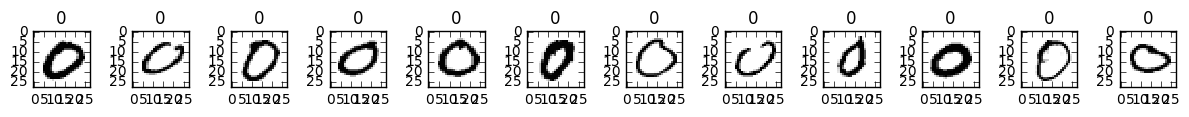

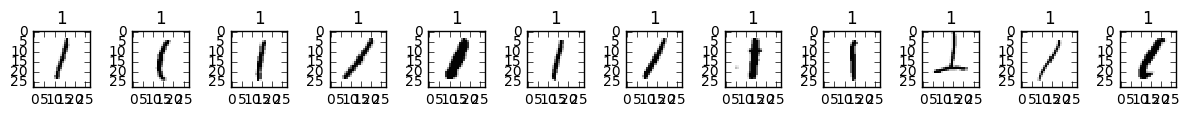

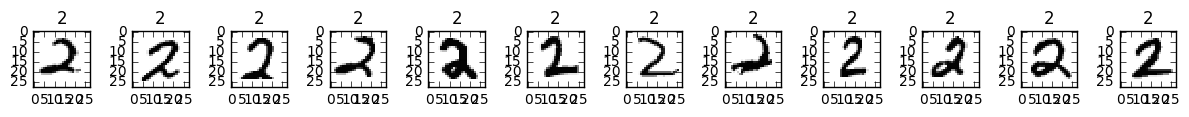

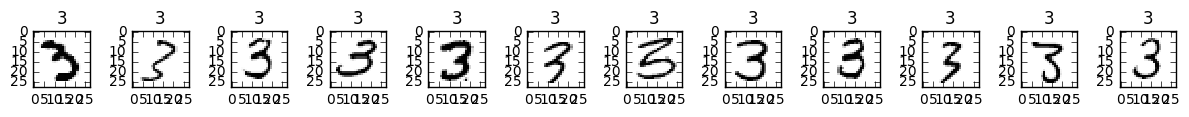

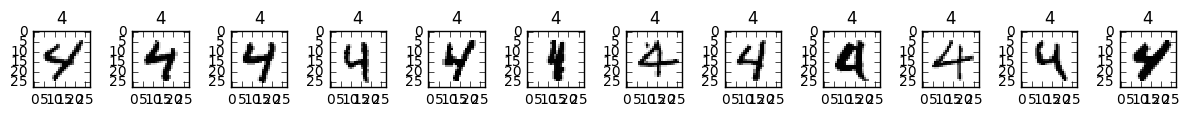

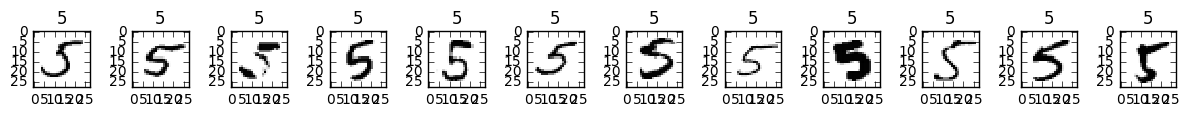

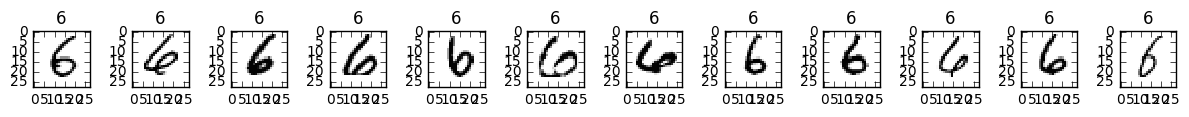

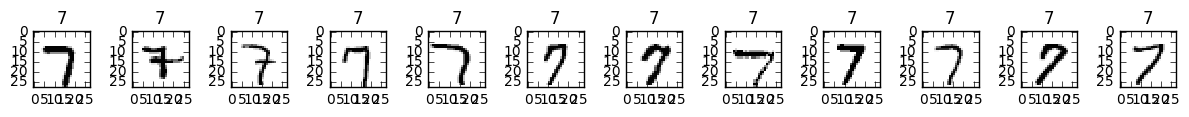

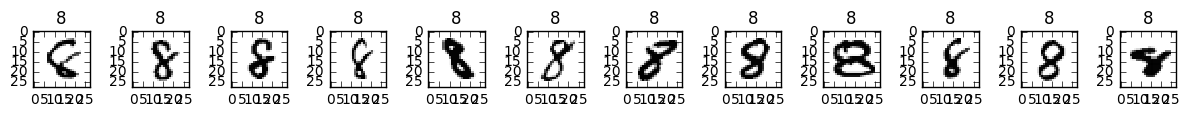

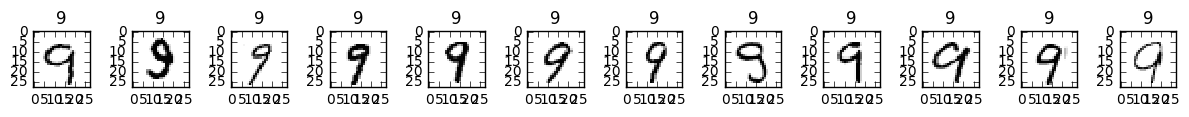

In [7]:
def sanity_check(data):
    """
    Prints digits as image along with their labels
    """
    img_labels = data[1]
    img_data =(data[0]*255).astype(int)
    indices = np.random.randint(img_data.shape[0]-1,size=12)
    fig = plt.figure(figsize=(12, 3), dpi=80)
    for index,indice in enumerate(indices):
        plt.subplot(1,12,index+1)
        plt.title(img_labels[indice])
        plt.imshow(img_data[indice], interpolation='nearest',cmap='Greys')
        plt.tight_layout()
    plt.show()
    
for i in range(0,10):    
    da = pickle.load( open(os.path.join(mnist_dest_folder,"mnist_training_digit_"+str(i)+".pickle"), "rb" ))
    sanity_check(da)

In [24]:
digits_data = list(pickle.load( open(os.path.join(mnist_dest_folder,"mnist_training_digit_"+str(i)+".pickle"), "rb" )) for i in range(10))
train_df = loadPickle(os.path.join(svhn_dest_folder,"train","digitStruct_nozeros.dataframe"))
test_df = loadPickle(os.path.join(svhn_dest_folder,"test","digitStruct_nozeros.dataframe"))

train_df = train_df.reindex(np.random.permutation(train_df.index)).reset_index(drop=True)
split = int(train_df.shape[0] * 0.9)
valid_df = train_df[split:].reset_index(drop=True)
train_df = train_df[:split]

print ("Training set size: %d" % train_df.shape[0])
print ("Validation set size: %d" % valid_df.shape[0])
print ("Test set size: %d" % test_df.shape[0])

Training set size: 30010
Validation set size: 3335
Test set size: 13054


In [29]:
def get_mnist_digit(digit):
    '''
    Get a random digit array from a digit value
    '''
    return digits_data[digit][0][np.random.randint(digits_data[digit][0].shape[0])]

def generate_data(numbers, scale=1,max_length=6, dims=(64,64), noise=0.0):
    """
    Generate dataset based on svh numbers. Return a tuple with
    - 64 x 64 images
    - digits
    - street number values
    - lengths
    """
    img_data = np.zeros((len(numbers), dims[0], dims[1], 1))
    values = np.zeros(len(numbers)).astype(int)
    digits = np.zeros((len(numbers),6)).astype(int)
    lengths = np.zeros((len(numbers),)).astype(int)
    
    for i, number in enumerate(numbers):
        values[i] = int(number)
        
        # numbers as lists of digits (ex: 345 -> [3,4,5])
        number_digits = [int(j) for j in list(str(values[i]))]
        lengths[i] = min(len(number_digits),6)
        digits[i,0:lengths[i]] = number_digits[:lengths[i]]  
        # labels must be classes, not values.
        # Our classes for lengths [1,2,3,4,5,6] are [0,1,2,3,4,5]
        lengths[i] -= 1 
        
        # Generate an image with the sequence of digits
        number_image = np.zeros((28,28*len(number_digits)))
        for k,digit in enumerate(number_digits):
            number_image[0:28, k*28:(k+1)*28] = get_mnist_digit(digit)

        scale = float(dims[0]) / ((lengths[i]+1) * 28)
        if scale != 1:
            number_image = imresize(number_image,scale,interp='bilinear')
        # Place it randomly in the canvas
        max_top = dims[0] - number_image.shape[0] 
        max_left = dims[1] - number_image.shape[1]      
        
        top = np.random.randint(0,max_top) if max_top > 0 else 0
        left = np.random.randint(0,max_left) if max_left > 0 else 0
        
        img_data[i,top:top+number_image.shape[0],left:left+number_image.shape[1],0] = number_image
        
        # Add noise
        if noise > 0:
            img_data[i] = skimage.util.random_noise(img_data[i], mode='gaussian', mean=noise)
        
    return (img_data, digits, values, lengths)


def dataset_sample(data):
    """
    Prints numbers as image along with their labels
    """
    labels = data[2]
    img_data = data[0].reshape(data[0].shape[0],data[0].shape[1],data[0].shape[2])
    fig = plt.figure(figsize=(12,8), dpi=80)
    for index,image in enumerate(img_data[:36]):
        plt.subplot(6, 6, index+1)
        plt.title(str(labels[index]) + " : " + str(data[1][index]) + str(data[3][index]))
        plt.imshow(image, cmap='Greys')
        plt.tight_layout()
    plt.show()
    
def generate_and_save_dataset(name,train_data,valid_data,test_data):
    saveAsPickle(train_data, os.path.join(svhn_dest_folder,str("train_%s.pickle" % name)))
    saveAsPickle(valid_data, os.path.join(svhn_dest_folder,str("valid_%s.pickle" % name)))
    saveAsPickle(test_data, os.path.join(svhn_dest_folder,str("test_%s.pickle" % name)))

    print ("\nTrain")
    dataset_sample(train_data)
    print ("Valid")
    dataset_sample(valid_data)
    print ("Test")
    dataset_sample(test_data)
    return train_data, valid_data, test_data

/home/hanu/dataset/svhn/f1/train_synth_64x64.pickle pickled!
/home/hanu/dataset/svhn/f1/valid_synth_64x64.pickle pickled!
/home/hanu/dataset/svhn/f1/test_synth_64x64.pickle pickled!

Train


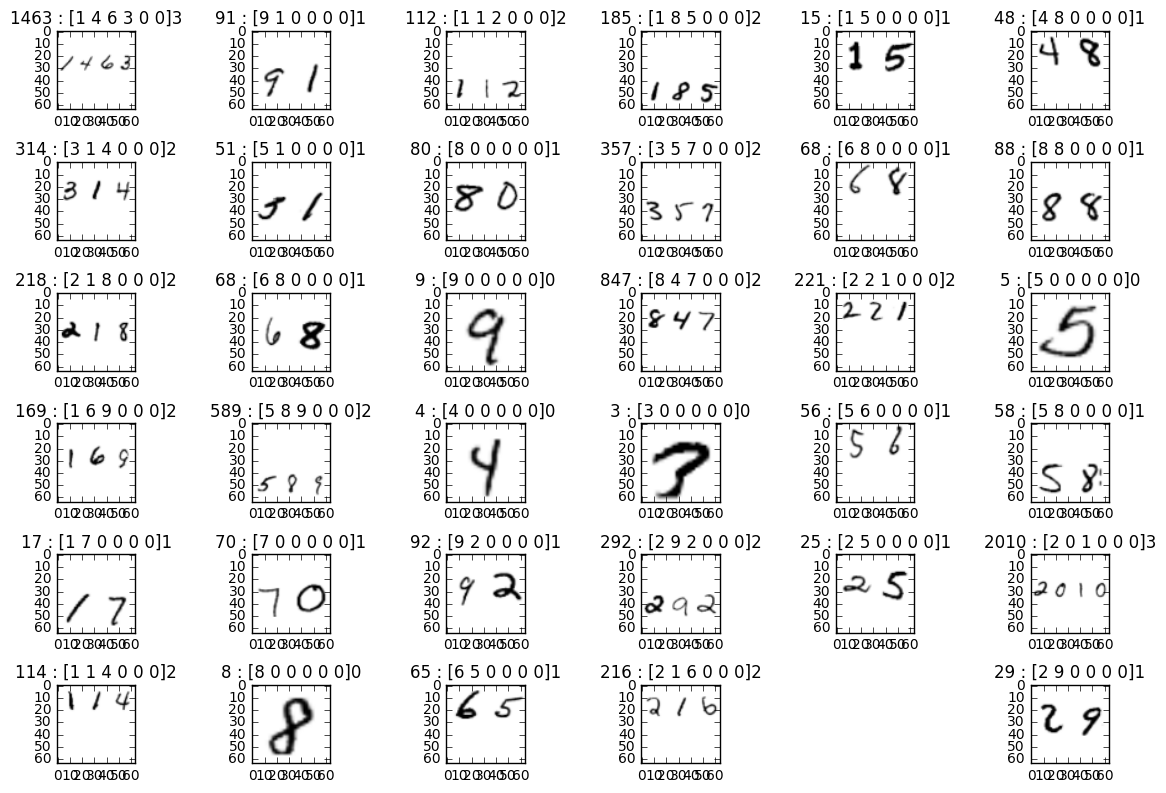

Valid


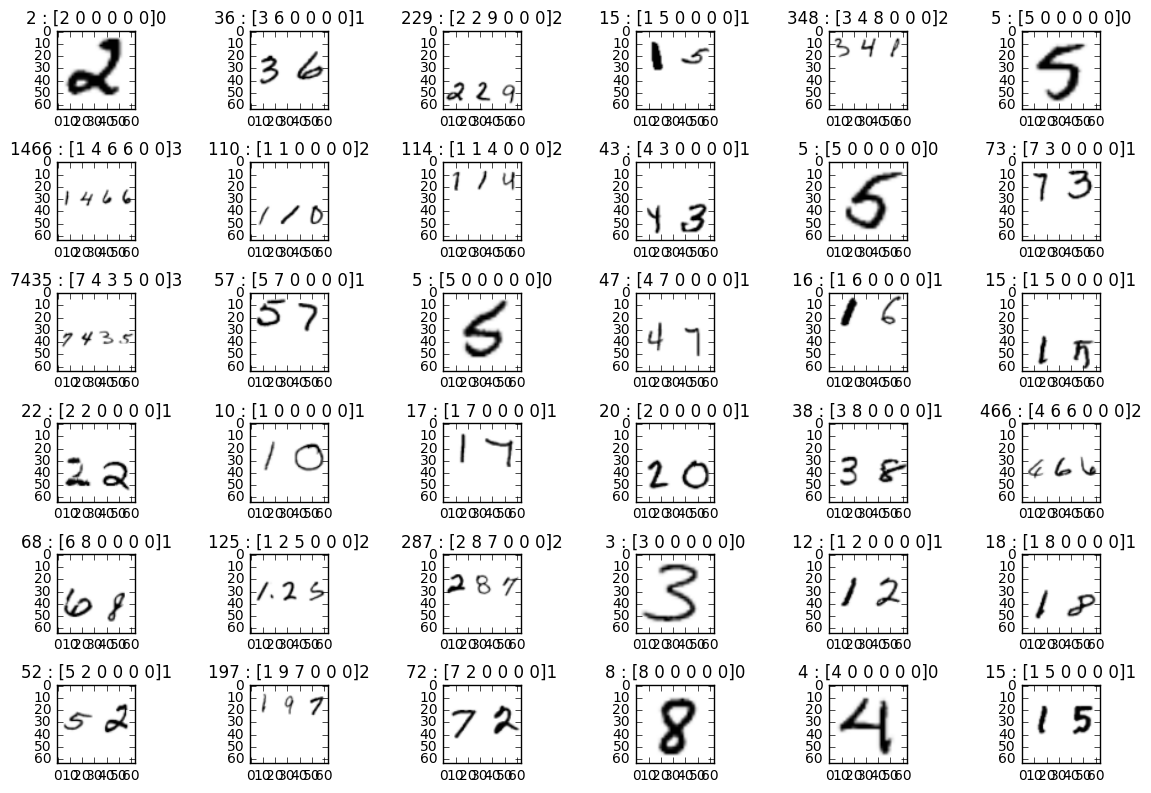

Test


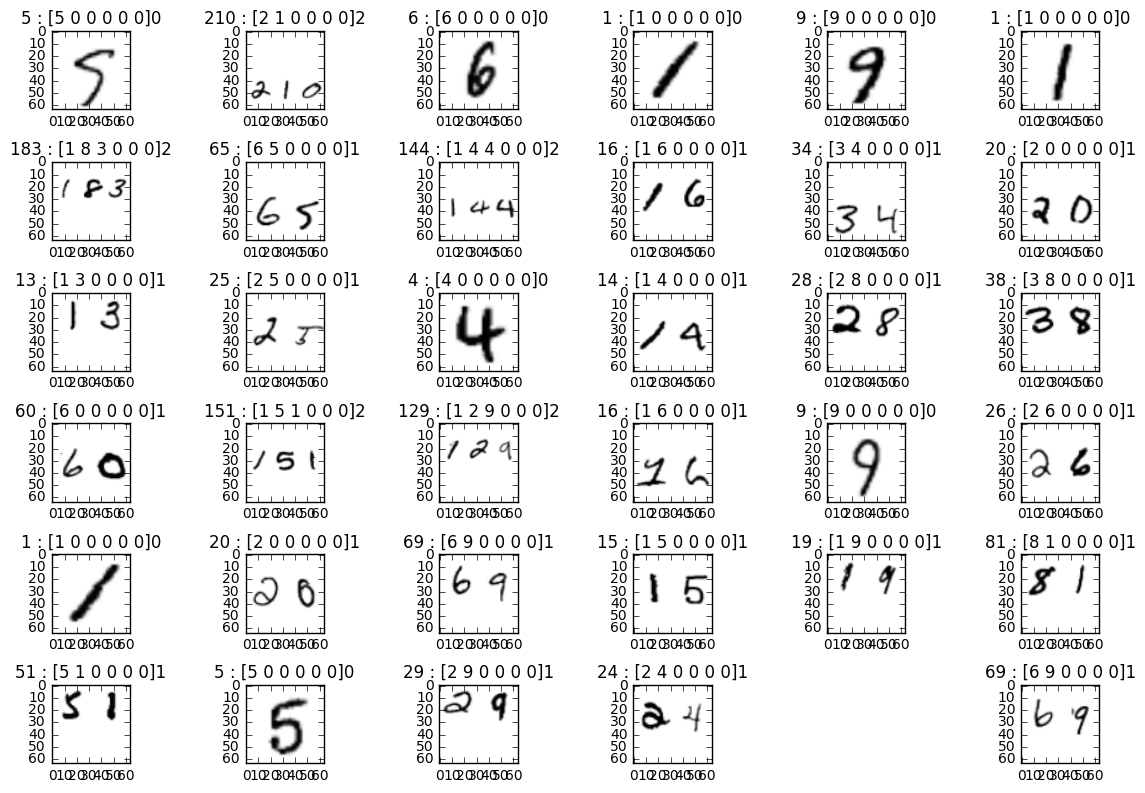

In [30]:
train_numbers = train_df['value'].tolist()
test_numbers = test_df['value'].tolist()
valid_numbers = valid_df['value'].tolist()
train,valid,test = generate_and_save_dataset("synth_64x64", 
                              generate_data(train_numbers), 
                              generate_data(valid_numbers), 
                              generate_data(test_numbers))

In [27]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from scipy.ndimage.interpolation import zoom
from __future__ import print_function
%matplotlib inline
from matplotlib import pyplot as plt
import datetime
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import os
import math
import random


In [28]:
os.getcwd()

'/home/hanu/digit_test1'

In [32]:
img_w = 64
img_h = 64

    
train_images, train_digits, train_values, train_length = loadPickle(os.path.join(svhn_dest_folder,"train_synth_64x64.pickle"))
test_images, test_digits, test_values, test_length = loadPickle(os.path.join(svhn_dest_folder,"valid_synth_64x64.pickle"))
valid_images,valid_digits, valid_values, valid_length = loadPickle(os.path.join(svhn_dest_folder,"test_synth_64x64.pickle"))

print (train_images.shape, train_digits.shape, train_values.shape, train_length.shape)
print (test_images.shape, test_digits.shape, test_values.shape, test_length.shape)
print (valid_images.shape, valid_digits.shape, valid_values.shape, valid_length.shape)

(30010, 64, 64, 1) (30010, 6) (30010,) (30010,)
(3335, 64, 64, 1) (3335, 6) (3335,) (3335,)
(13054, 64, 64, 1) (13054, 6) (13054,) (13054,)


In [33]:
def plot_accuracy(train_accuracy,valid_accuracy,num_steps,report_freq):
    fig, ax = plt.subplots(figsize=(6, 3), dpi=80)
    ax.plot(range(0,num_steps,report_freq), train_accuracy, 'k-', label='Train accuracy')
    ax.plot(range(0,num_steps,report_freq), valid_accuracy, 'k:', label='Valid. accuracy')

    legend = ax.legend(loc='lower center', shadow=True)

    for label in legend.get_texts():
        label.set_fontsize('large')

    for label in legend.get_lines():
        label.set_linewidth(1.5)  # the legend line width
    plt.show()

In [38]:
SEED = 66478
num_channels = 1
num_labels = 6

def tf_get_length_value(length_class_tensor):
    '''A utility function to get the length value [1,6] from the length class id [0,5]'''
    return tf.add(length_class_tensor,1)

def get_conv2d(name, data, patch, d_in, d_out, stride, pooling=None):
    weights = tf.Variable(tf.truncated_normal([patch, patch, d_in, d_out], stddev=get_conv2d_weights_init_stddev(img_w,img_h,d_in)), name=str('%s_w' % name))
    biases = tf.Variable(tf.zeros([d_out]), name=str('%s_b' % name))
    layer = tf.nn.relu(tf.nn.conv2d(data, weights, stride, padding='SAME') + biases)
    if pooling is not None:
        layer = tf.nn.max_pool(layer, pooling, pooling, padding='SAME')
    return weights, biases, layer

def get_fc(name, data, depth, relu=True):
    inbound = int(data.get_shape()[1])
    weights = tf.Variable(tf.truncated_normal([inbound, depth], stddev=math.sqrt(2.0 / inbound), name=str('%s_w' % name)))
    biases = tf.Variable(tf.zeros([depth]), name=str('%s_b' % name))
    layer = tf.matmul(data, weights) + biases
    if relu is True:
        layer = tf.nn.relu(layer)
    return weights, biases, layer

def get_conv2d_weights_init_stddev(w,h,d_in):
    # from https://arxiv.org/pdf/1502.01852v1.pdf
    return math.sqrt(2.0 / (w*h*d_in))

graph = tf.Graph()
with graph.as_default():

    # Placeholders
    data = tf.placeholder(tf.float32,shape=(None, img_h, img_w, num_channels),name='data')
    labels_length = tf.placeholder(tf.int32, shape=(None,),name='length')
    digit_labels = tf.placeholder(tf.int32, shape=(None,num_labels),name='digits')
    l_rate = tf.placeholder(tf.float32, name='learning_rate')
    l2_beta = tf.placeholder(tf.float32, name='l2_beta')
    dropout_keep_prob = tf.placeholder(tf.float32)
    
    # Model.
    
    w_c1,b_c1,conv1 = get_conv2d('conv1', data=data, patch=3, d_in=1, d_out=16, 
                             stride=[1,1,1,1], pooling=[1,2,2,1])
    
    w_c2,b_c2,conv2 = get_conv2d('conv2', data=conv1,patch=3, d_in=16, d_out=32, 
                             stride=[1,1,1,1], pooling=[1,2,2,1])

    w_c3,b_c3,conv3 = get_conv2d('conv3', data=conv2,patch=3, d_in=32, d_out=64, 
                             stride=[1,1,1,1], pooling=[1,2,2,1])
    
    w_c4,b_c4,conv4 = get_conv2d('conv4', data=conv3,patch=3, d_in=64, d_out=128, 
                             stride=[1,1,1,1], pooling=[1,2,2,1])
    

    shape = conv4.get_shape().as_list()
    reshape = tf.reshape(conv4, [-1, shape[1] * shape[2] * shape[3]])
    
    w_fc1, b_fc1, fc1 = get_fc('fc1', reshape, 256,relu=True)
    fc1 = tf.nn.dropout(fc1, keep_prob=dropout_keep_prob, seed=SEED)
    w_fc2, b_fc2, fc2 = get_fc('fc1', fc1, 128,relu=True)
    features = tf.nn.dropout(fc2, keep_prob=dropout_keep_prob, seed=SEED)
    
    # Length logits and weights
    length_weigths, length_biases, logits_length = get_fc('fc2_L', features, num_labels, relu=False)
     
    # Digits logits and weights
    digits_pack = [get_fc(str("fc2_D%d" % i), features, 10, relu=False) for i in range(num_labels)]
    digit_weights = [digits_pack[i][0] for i in range(num_labels)]
    digit_biases = [digits_pack[i][1] for i in range(num_labels)]
    logits_digits = tf.pack([digits_pack[i][2] for i in range(num_labels)])

    # L2 regularization for the fully connected parameters.
    regularizers = tf.nn.l2_loss(w_fc1) + tf.nn.l2_loss(b_fc1) 
    
    # Loss calculation
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits_length, labels_length))   

    # Add the regularization term to the loss.
    loss += l2_beta * regularizers
    
    # generating a tensor (?,num_labels) where each row contains 1s, 2s, 3s,... Will be used

    fills = tf.pack([tf.fill([tf.shape(data)[0]], i) for i in range(num_labels)])

    masks = list()   
    dmasked = list()
    lmasked = list()
    digit_labels_t = tf.transpose(digit_labels)
    for i in range(num_labels):
        # http://stackoverflow.com/questions/34128104/tensorflow-creating-mask-of-varied-lengths
        # get a mask of logits for the first (length - 1) digits
        # (?,6) => (count(digit_index < length), 6)
        current_mask = tf.less(fills[i], tf_get_length_value(labels_length))
        masks.append(current_mask)
        dmasked.append(tf.boolean_mask(logits_digits[i],masks[i]))
        lmasked.append(tf.boolean_mask(digit_labels_t[i],masks[i]))
        loss += tf.cond(tf.less(0,tf.shape( lmasked[i])[0]),
                        lambda: tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(dmasked[i], lmasked[i])),
                        lambda: tf.constant(0.0))
    
    # Optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=l_rate, beta1=0.9, beta2=0.999, epsilon=1e-08, use_locking=False, name='Adam')
    backprop = optimizer.minimize(loss)
    masks = tf.pack(masks)
    # length prediction
    preds_l = tf.nn.softmax(logits_length)
    # digits predictions (including non existing digits)
    preds_d = [tf.nn.softmax(logits_digits[i]) for i in range(num_labels)]
    
    ### ACCURACY REPORTING ###
    
    # Compute a (i=num_labels,j=?) tensor where True means 
    # that the ith digit from the jth number was correctly predicted.
    correct_preds_d = tf.pack([tf.equal(tf.cast(tf.argmax(preds_d[i],1),tf.int32),digit_labels_t[i]) for i in range(num_labels)])

    # Derive a (?,num_labels) binary matrix where:
    # 1 means the j-th digit from i-th number was predicted correctly and
    # 0 means the digit is either not predicted correctly or not present (if the digit position >= number length)
    correctness_matrix = tf.transpose(tf.mul(tf.cast(correct_preds_d,tf.int32),tf.cast(masks,tf.int32)))
    
    # The global prediction is correct if the sum along a given row equals the length of this row's number.
    correct = tf.equal(tf.reduce_sum(correctness_matrix,1), tf.cast(tf_get_length_value(labels_length),tf.int32))
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32)) * 100
    
    # PARTIAL ACCURACY
    # Length prediction accuracy
    correct_l = tf.equal(tf.cast(tf.argmax(preds_l, 1),tf.int32), labels_length)
    accuracy_l = tf.reduce_mean(tf.cast(correct_l, tf.float32)) * 100
    
    # Individual digits predictions accuracy

    # Remove predictions of non existent digits: (ex: prediction for digit 4 when there are only 3 digits)
    # Doing so allows to compute accurate accuracy for each digit.
    preds_d_masked = [tf.nn.softmax(tf.boolean_mask(logits_digits[i],masks[i])) for i in range(num_labels)]   
    correct_d = [tf.equal(tf.cast(tf.argmax(preds_d_masked[i],1),tf.int32),lmasked[i]) for i in range(num_labels)]
    accuracy_d = tf.pack([tf.reduce_mean(tf.cast(correct_d[i], tf.float32)) * 100 for i in range(num_labels)])
    

ValueError: Shape (6, ?) must have rank 1

In [35]:
batch_size = 16

def get_length_from_class(class_id):
    return class_id + 1

def run_session(learning_rate=3.1e-4, l2=16e-4, num_steps=20001, verbose=True, report_freq=250, keep_prob=0.5, checkpoint_filepath=None):
    with tf.Session(graph=graph) as session:
            
        train_accuracy =list()
        valid_accuracy = list()
        start_time = datetime.datetime.now()
        tf.initialize_all_variables().run()
        
        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()
        # Restore saved variables from disk, if any.
        
        if checkpoint_filepath is not None and os.path.exists(checkpoint_filepath):
            saver.restore(session, checkpoint_filepath)
            print ('Restoring variables...')
        if verbose:
            print("Initialized")
        for step in range(num_steps):

            offset = (step * batch_size) % (train_length.shape[0] - batch_size)
            # Generate a minibatch.
            batch_data = train_images[offset:(offset + batch_size), :]
            batch_length = train_length[offset:(offset + batch_size)]
            batch_digits = train_digits[offset:(offset + batch_size), :]
            feed_train = {data: batch_data, 
                          labels_length: batch_length,
                          digit_labels: batch_digits,
                          l_rate: learning_rate,
                          l2_beta: l2, 
                          dropout_keep_prob : keep_prob
                         }
            _, l,bacc = session.run([backprop, loss, accuracy], feed_dict=feed_train)

            if (step % report_freq == 0):
                train_accuracy.append(bacc)
                if verbose:
                    print("\nMinibatch loss at step %d: %f - Accuracy: %.1f%% - time: %s\n" % (step, l, bacc, datetime.datetime.now()-start_time ))
                random_rows = np.random.randint(valid_length.shape[0],size=300)
                valid_dict = {
                    data: valid_images[random_rows,:], 
                    labels_length: valid_length[random_rows],
                    digit_labels: valid_digits[random_rows,:],
                    dropout_keep_prob : 1
                }

                vpreds_d, vpreds_l, vacc_d, vacc_l, vcorr, vacc  = session.run([preds_d, preds_l,accuracy_d, accuracy_l, correct, accuracy],feed_dict=valid_dict)
                valid_accuracy.append(vacc)
                if verbose:
                    print("Valid. acc: %.1f%% \nlen: %.1f%% \nd0: %.1f%% \nd1: %.1f%% \nd2: %.1f%% \nd3: %.1f%% \nd4: %.1f%% \nd5: %.1f%%"  
                          % (vacc, vacc_l, vacc_d[0], vacc_d[1], vacc_d[2], vacc_d[3], vacc_d[4], vacc_d[5]))
                    print ("\nVal. \t\tl \td0 \td1 \td2 \td3 \td4 \td5")
                    for i,rowindex in enumerate(random_rows[:10]):
                        row = str(int(valid_values[rowindex])) + " ("+ str(vcorr[i])+")" + "\t"
                        predicted_length = get_length_from_class(np.argmax(vpreds_l[i]))
                        row += str(predicted_length)+"\t"
                        for j in range(predicted_length):
                            row += str(np.argmax(vpreds_d[j][i])) + "\t"

                        print (row)
                # Save the variables to disk.
                if checkpoint_filepath is not None:
                    saver.save(session, checkpoint_filepath)

        test_dict = {
                    data: test_images, 
                    labels_length: test_length,
                    digit_labels: test_digits,
                    dropout_keep_prob : 1
            }

        tpreds_d, tpreds_l, tacc_d, tacc_l, tcorr, tacc= session.run([preds_d, preds_l,accuracy_d, accuracy_l,correct,accuracy],feed_dict=test_dict)
        if verbose:
            print("Test acc: %.1f%% \n l: %.1f%% \nd0: %.1f%% \nd1: %.1f%% \nd2: %.1f%% \nd3: %.1f%% \nd4: %.1f%% \nd5: %.1f%%"  
                  % (tacc, tacc_l, tacc_d[0], tacc_d[1], tacc_d[2], tacc_d[3], tacc_d[4], tacc_d[5]))
            print ("\nVal. \t\tl \td0 \td1 \td2 \td3 \td4 \td5")
            for i in range(test_length.shape[0]):
                row = str(int(test_values[i])) + " ("+ str(tcorr[i])+")" + "\t"
                predicted_length = get_length_from_class(np.argmax(tpreds_l[i]))
                row += str(predicted_length)+"\t"
                for j in range(predicted_length):
                    row += str(np.argmax(tpreds_d[j][i])) + "\t"
                print (row)    

    end_time = datetime.datetime.now()
    if verbose:
        plot_accuracy(train_accuracy,valid_accuracy,num_steps,report_freq)
    return train_accuracy, valid_accuracy, tacc, (end_time-start_time)

In [36]:
ta,va,te,ct = run_session(num_steps=15000, report_freq=1000, keep_prob=0.8)

Initialized


NameError: global name 'backprop' is not defined